In [2]:
import pandas as pd
import numpy as np
import openpyxl

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager
from matplotlib.legend_handler import HandlerLine2D

# from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc,roc_curve, roc_auc_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier, RidgeClassifierCV, SGDClassifier, Perceptron
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier, VotingClassifier, StackingClassifier
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import Ridge
from sklearn.naive_bayes import BernoulliNB, GaussianNB

from xgboost import XGBClassifier
from xgboost import XGBRegressor

#import pickle

import shap

In [3]:
# Load the original data file
df = pd.read_csv(r'encoded_data\final_dataset.csv')
df

,number_of_jobs,first_job_level,first_job_recency_months,first_job_duration_months,first_company_size,first_company_age_years,first_company_apparel,first_company_sri_lankan,last_job_level,last_job_recency_months,...,last_institute_age_years,last_institute_sri_lankan,minimum_qual_duration_months,maximum_qual_duration_months,average_qual_duration_months,total_qual_duration_months,number_of_institutes,duration ratio in sri lanka_y,job_change,job_change_horizon
0,5,4,214,55,4,36,1,1,6,21,...,0,0,48,168,108.000000,216,2,0.000000,0,0
1,4,3,72,26,4,36,1,1,4,9,...,0,0,12,156,72.000000,216,3,0.222222,1,1
2,6,1,114,8,0,0,0,0,5,21,...,17,0,0,156,45.600000,228,5,0.000000,0,0
3,7,3,218,29,0,0,0,0,8,9,...,140,0,12,60,36.000000,72,2,0.000000,0,0
4,7,1,97,13,3,0,0,1,5,7,...,0,0,0,168,51.000000,204,4,1.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1316,4,10,46,9,2,20,0,0,5,87,...,158,0,0,24,30.770300,40,7,0.000000,0,0
1317,3,3,97,22,0,0,0,0,7,9,...,7,0,12,156,68.295941,228,3,0.000000,0,0
1318,5,3,105,35,4,36,1,1,5,14,...,50,0,0,162,35.839993,216,4,0.000000,0,0
1319,10,2,114,5,4,36,1,1,5,18,...,28,0,12,175,40.516883,220,3,0.000000,0,0


In [20]:
# Create bins
# bins:
# 0 months = -1
# 0-6 months = 0
# 6-12 months = 1
df['class'] = pd.cut(df['job_change_horizon'], bins=[-1, 0, 6, 12], labels=[-1, 0, 1])


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [5]:
df = df.loc[df['class'] != -1] 
df['class'].value_counts()

class
0     228
1      90
-1      0
Name: count, dtype: int64

In [6]:
# pd.set_option('display.max_columns', None)
df['class'] = df['class'].astype('int64')
df.dtypes


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


number_of_jobs                     int64
first_job_level                    int64
first_job_recency_months           int64
first_job_duration_months          int64
first_company_size                 int64
first_company_age_years            int64
first_company_apparel              int64
first_company_sri_lankan           int64
last_job_level                     int64
last_job_recency_months            int64
last_job_duration_months           int64
last_company_size                  int64
last_company_age_years             int64
last_company_apparel               int64
last_company_sri_lankan            int64
minimum_job_duration_months        int64
maximum_job_duration_months        int64
average_job_duration_months      float64
total_job_duration_months          int64
number of turnovers                int64
number of companies                int64
number of levelups                 int64
total levelups                     int64
average years for levelup        float64
total LUs within

In [7]:
# Check outliers using the z-score measure
columns_to_remove_outliers = ['number_of_jobs', 'first_job_level',
       'first_job_recency_months', 'first_job_duration_months',
       'first_company_size', 'first_company_age_years',
       'first_company_apparel', 'first_company_sri_lankan', 'last_job_level',
       'last_job_recency_months', 'last_job_duration_months',
       'last_company_size', 'last_company_age_years', 'last_company_apparel',
       'last_company_sri_lankan', 'minimum_job_duration_months',
       'maximum_job_duration_months', 'average_job_duration_months',
       'total_job_duration_months', 'number of turnovers',
       'number of companies', 'number of levelups', 'total levelups',
       'average years for levelup', 'total LUs within company',
       'total LUs outside company', 'number of lateral movements',
       'duration ratio in sri lanka_x', 'duration ratio in apparel',
       'number_of_Qualifications', 'first_qual_level',
       'first_qual_recency_months', 'first_qual_duration_months',
       'first_institute_size', 'first_institute_age_years',
       'first_institute_sri_lankan', 'last_qual_level',
       'last_qual_recency_months', 'last_qual_duration_months',
       'last_institute_size', 'last_institute_age_years',
       'last_institute_sri_lankan', 'minimum_qual_duration_months',
       'maximum_qual_duration_months', 'average_qual_duration_months',
       'total_qual_duration_months', 'number_of_institutes',
       'duration ratio in sri lanka_y']

print("Number of outliers before removal:")
for col in columns_to_remove_outliers:
    outliers_count = len(df) - len(df[(df[col] >= df[col].mean() - 5 * df[col].std()) & (df[col] <= df[col].mean() + 5 * df[col].std())])
    print(f"{col}: {outliers_count}")

Number of outliers before removal:
number_of_jobs: 0
first_job_level: 0
first_job_recency_months: 0
first_job_duration_months: 0
first_company_size: 0
first_company_age_years: 1
first_company_apparel: 0
first_company_sri_lankan: 0
last_job_level: 0
last_job_recency_months: 0
last_job_duration_months: 0
last_company_size: 0
last_company_age_years: 3
last_company_apparel: 0
last_company_sri_lankan: 0
minimum_job_duration_months: 5
maximum_job_duration_months: 0
average_job_duration_months: 2
total_job_duration_months: 0
number of turnovers: 0
number of companies: 0
number of levelups: 0
total levelups: 0
average years for levelup: 0
total LUs within company: 0
total LUs outside company: 0
number of lateral movements: 1
duration ratio in sri lanka_x: 0
duration ratio in apparel: 0
number_of_Qualifications: 0
first_qual_level: 0
first_qual_recency_months: 0
first_qual_duration_months: 0
first_institute_size: 0
first_institute_age_years: 0
first_institute_sri_lankan: 0
last_qual_level: 0
la

In [8]:
# Define function to remove outliers
def remove_outliers(df, columns, threshold=5):
    for col in columns:
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        df = df[(z_scores < threshold)]
    return df

In [9]:
df_cleaned = remove_outliers(df, columns_to_remove_outliers)
df_cleaned

,number_of_jobs,first_job_level,first_job_recency_months,first_job_duration_months,first_company_size,first_company_age_years,first_company_apparel,first_company_sri_lankan,last_job_level,last_job_recency_months,...,last_institute_sri_lankan,minimum_qual_duration_months,maximum_qual_duration_months,average_qual_duration_months,total_qual_duration_months,number_of_institutes,duration ratio in sri lanka_y,job_change,job_change_horizon,class
1,4,3,72,26,4,36,1,1,4,9,...,0,12,156,72.000000,216,3,0.222222,1,1,0
7,2,4,93,74,4,36,1,1,5,19,...,0,36,156,84.000000,336,4,0.464286,1,4,0
12,8,1,138,6,0,15,0,1,6,9,...,0,0,156,43.200000,216,5,0.000000,1,4,0
21,7,1,94,13,4,0,0,0,3,21,...,0,0,96,40.000000,240,6,0.000000,1,6,0
30,4,2,71,25,0,0,0,0,3,22,...,0,24,48,36.000000,72,2,0.666667,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1276,6,1,16,66,4,56,1,1,4,4,...,0,42,156,72.037094,256,3,0.000000,1,7,1
1278,7,9,166,24,0,0,0,0,5,3,...,0,24,24,12.180666,24,4,0.000000,1,2,0
1279,2,3,78,27,4,36,1,1,1,18,...,1,20,152,80.578723,148,3,0.177028,0,4,0
1285,5,5,154,23,0,0,0,0,3,3,...,1,8,124,48.996921,48,2,0.000000,1,7,1


# Training classification models

In [11]:
X = df.drop(["job_change","job_change_horizon","class"], axis=1)
y = df['class']

In [12]:
X

,number_of_jobs,first_job_level,first_job_recency_months,first_job_duration_months,first_company_size,first_company_age_years,first_company_apparel,first_company_sri_lankan,last_job_level,last_job_recency_months,...,last_qual_duration_months,last_institute_size,last_institute_age_years,last_institute_sri_lankan,minimum_qual_duration_months,maximum_qual_duration_months,average_qual_duration_months,total_qual_duration_months,number_of_institutes,duration ratio in sri lanka_y
1,4,3,72,26,4,36,1,1,4,9,...,12,0,0,0,12,156,72.000000,216,3,0.222222
7,2,4,93,74,4,36,1,1,5,19,...,36,0,0,0,36,156,84.000000,336,4,0.464286
10,6,1,218,49,4,0,0,0,10,16,...,0,0,0,0,0,0,0.000000,0,3,0.000000
12,8,1,138,6,0,15,0,1,6,9,...,0,0,0,0,0,156,43.200000,216,5,0.000000
21,7,1,94,13,4,0,0,0,3,21,...,12,0,0,0,0,96,40.000000,240,6,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,7,9,166,24,0,0,0,0,5,3,...,24,0,0,0,24,24,12.180666,24,4,0.000000
1279,2,3,78,27,4,36,1,1,1,18,...,24,4,158,1,20,152,80.578723,148,3,0.177028
1285,5,5,154,23,0,0,0,0,3,3,...,16,4,101,1,8,124,48.996921,48,2,0.000000
1290,6,3,51,25,4,36,1,1,3,3,...,48,0,0,0,48,46,68.829366,142,6,0.000000


In [36]:
# scaler = MinMaxScaler()
# X_normalised = scaler.fit_transform(X)
# X_normalised

In [13]:
seednumber = 10
shuffle_param = True
np.random.seed(seednumber)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=shuffle_param)

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)

MLA = [
    #KNN
    KNeighborsClassifier(3),
    #Trees
    DecisionTreeClassifier(),
    #ensemble
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    XGBClassifier(),
    #Navie Bayes
    BernoulliNB(),
    GaussianNB(),
    #GLM
    LogisticRegression(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    RidgeClassifierCV(),
    SGDClassifier(),
    Perceptron()   
    ]

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

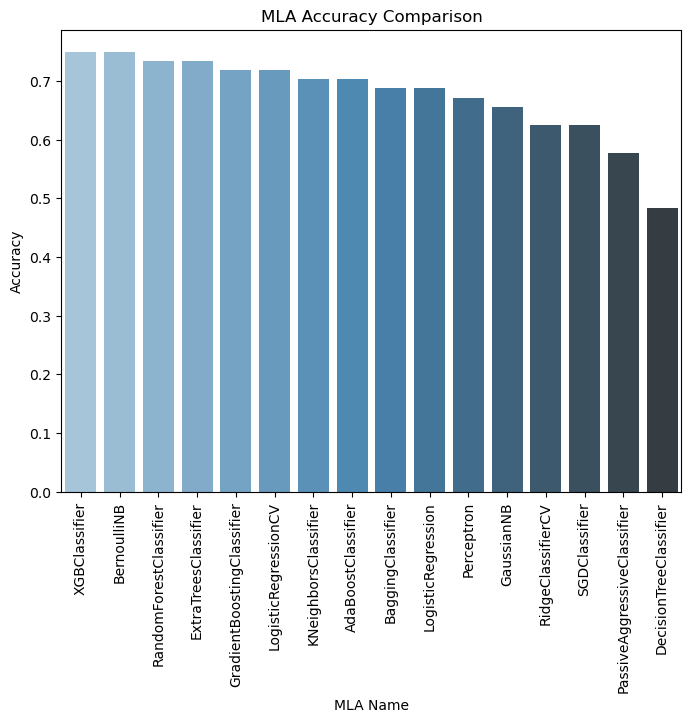

                       MLA Name Accuracy
7                 XGBClassifier   75.00%
8                   BernoulliNB   75.00%
2        RandomForestClassifier   73.44%
6          ExtraTreesClassifier   73.44%
4    GradientBoostingClassifier   71.88%
11         LogisticRegressionCV   71.88%
0          KNeighborsClassifier   70.31%
3            AdaBoostClassifier   70.31%
5             BaggingClassifier   68.75%
10           LogisticRegression   68.75%
15                   Perceptron   67.19%
9                    GaussianNB   65.62%
13            RidgeClassifierCV   62.50%
14                SGDClassifier   62.50%
12  PassiveAggressiveClassifier   57.81%
1        DecisionTreeClassifier   48.44%


In [39]:
row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    MLA_compare.loc[row_index,'Accuracy'] = accuracy_score(y_test, y_pred)
    #MLA_compare.loc[row_index,'MLA Precission'] = precision_score(y_test, y_pred)
    #MLA_compare.loc[row_index,'MLA Recall'] = recall_score(y_test, y_pred)
    row_index+=1

MLA_compare.sort_values(by = ['Accuracy'], ascending = False, inplace = True) 

plt.subplots(figsize=(8,6))
sns.barplot(x = "MLA Name", y = "Accuracy", data = MLA_compare, palette=("Blues_d"))
plt.xticks(rotation=90)
plt.title('MLA Accuracy Comparison')
plt.show()

MLA_compare['Accuracy'] = MLA_compare['Accuracy'].apply(lambda x: "{0:.2f}%".format(x*100))

print(MLA_compare)

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

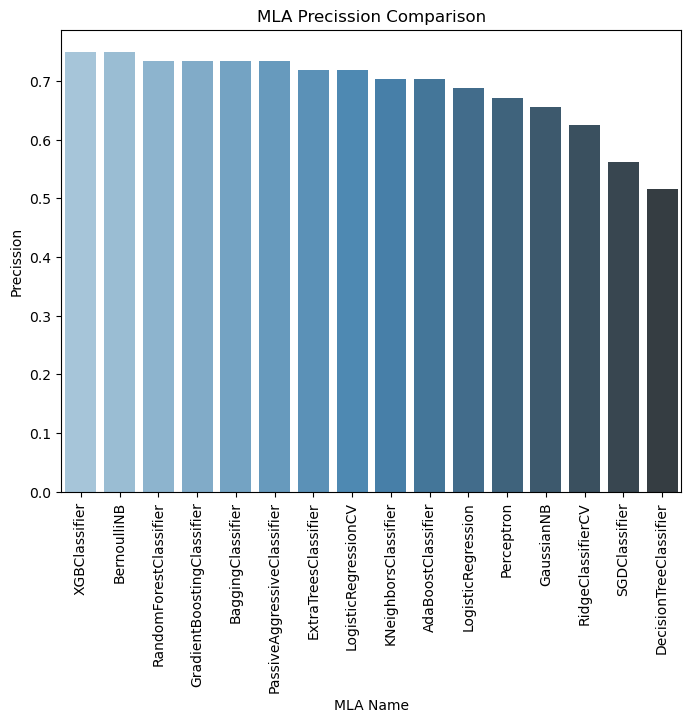

                       MLA Name Accuracy Precission
7                 XGBClassifier   75.00%     75.00%
8                   BernoulliNB   75.00%     75.00%
2        RandomForestClassifier   73.44%     73.44%
4    GradientBoostingClassifier   71.88%     73.44%
5             BaggingClassifier   68.75%     73.44%
12  PassiveAggressiveClassifier   57.81%     73.44%
6          ExtraTreesClassifier   73.44%     71.88%
11         LogisticRegressionCV   71.88%     71.88%
0          KNeighborsClassifier   70.31%     70.31%
3            AdaBoostClassifier   70.31%     70.31%
10           LogisticRegression   68.75%     68.75%
15                   Perceptron   67.19%     67.19%
9                    GaussianNB   65.62%     65.62%
13            RidgeClassifierCV   62.50%     62.50%
14                SGDClassifier   62.50%     56.25%
1        DecisionTreeClassifier   48.44%     51.56%


In [40]:
row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    #MLA_compare.loc[row_index,'Accuracy'] = accuracy_score(y_test, y_pred)
    MLA_compare.loc[row_index,'Precission'] = precision_score(y_test, y_pred, average='micro')
    #MLA_compare.loc[row_index,'MLA Recall'] = recall_score(y_test, y_pred)
    row_index+=1

MLA_compare.sort_values(by = ['Precission'], ascending = False, inplace = True) 

plt.subplots(figsize=(8,6))
sns.barplot(x = "MLA Name", y = "Precission", data = MLA_compare, palette=("Blues_d"))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

MLA_compare['Precission'] = MLA_compare['Precission'].apply(lambda x: "{0:.2f}%".format(x*100))

print(MLA_compare)

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please

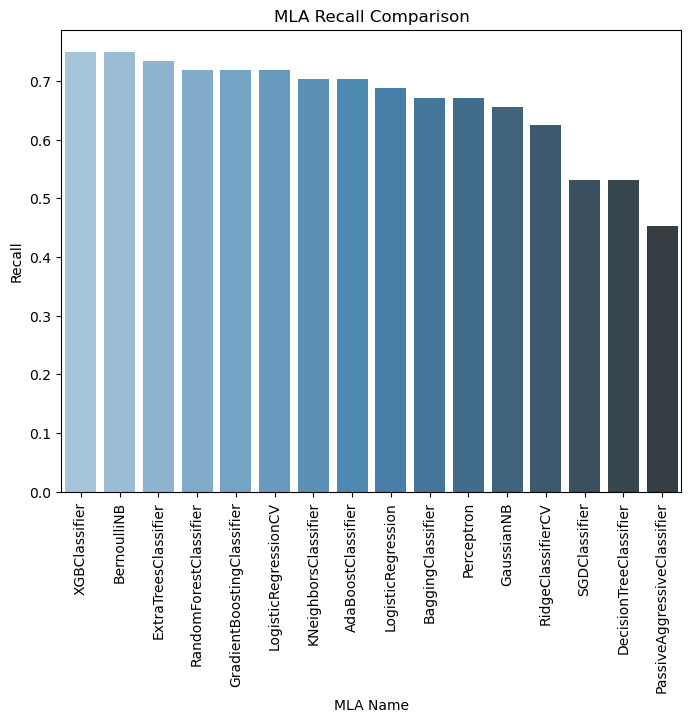

                       MLA Name Accuracy Precission  Recall
7                 XGBClassifier   75.00%     75.00%  75.00%
8                   BernoulliNB   75.00%     75.00%  75.00%
6          ExtraTreesClassifier   73.44%     71.88%  73.44%
2        RandomForestClassifier   73.44%     73.44%  71.88%
4    GradientBoostingClassifier   71.88%     73.44%  71.88%
11         LogisticRegressionCV   71.88%     71.88%  71.88%
0          KNeighborsClassifier   70.31%     70.31%  70.31%
3            AdaBoostClassifier   70.31%     70.31%  70.31%
10           LogisticRegression   68.75%     68.75%  68.75%
5             BaggingClassifier   68.75%     73.44%  67.19%
15                   Perceptron   67.19%     67.19%  67.19%
9                    GaussianNB   65.62%     65.62%  65.62%
13            RidgeClassifierCV   62.50%     62.50%  62.50%
14                SGDClassifier   62.50%     56.25%  53.12%
1        DecisionTreeClassifier   48.44%     51.56%  53.12%
12  PassiveAggressiveClassifier   57.81%

In [41]:
row_index = 0
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred = alg.predict(X_test)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'MLA Name'] = MLA_name
    #MLA_compare.loc[row_index,'Accuracy'] = accuracy_score(y_test, y_pred)
    #MLA_compare.loc[row_index,'Precission'] = precision_score(y_test, y_pred)
    MLA_compare.loc[row_index,'Recall'] = recall_score(y_test, y_pred, average='micro')
    row_index+=1

MLA_compare.sort_values(by = ['Recall'], ascending = False, inplace = True) 

plt.subplots(figsize=(8,6))
sns.barplot(x = "MLA Name", y = "Recall", data = MLA_compare, palette=("Blues_d"))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

MLA_compare['Recall'] = MLA_compare['Recall'].apply(lambda x: "{0:.2f}%".format(x*100))

print(MLA_compare)

In [14]:
# Defining classification models
xgb_clf = XGBClassifier()

rf_clf = RandomForestClassifier()

In [15]:
# Defining function to run classification models with frid search
def train_classification_model(model, param_grid, X_train, y_train, X_test, y_test):
    # Create the GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=5)

    # Fit the GridSearchCV object to the data
    grid_search.fit(X_train, y_train)

    # Get the best parameters and the best estimator
    best_params = grid_search.best_params_
    best_estimator = grid_search.best_estimator_

    # Print the best parameters
    print("Best Parameters:", best_params)

    # Use the best estimator to make predictions on the test set
    y_pred = best_estimator.predict(X_test)

    # Print confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", cm)

    print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [16]:
# Training XGBClassifier model
xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[43  3]
 [13  5]]
              precision    recall  f1-score   support

           0       0.77      0.93      0.84        46
           1       0.62      0.28      0.38        18

    accuracy                           0.75        64
   macro avg       0.70      0.61      0.61        64
weighted avg       0.73      0.75      0.71        64



In [17]:
xgb_param_grid = {
        'learning_rate': [0.1, 0.01,0.001],
        'n_estimators': [80, 100, 120],
        'max_depth': [2, 3, 4],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0]
}

In [18]:
# Training XGBClassifier model with grid search
train_classification_model(xgb_clf, xgb_param_grid, X_train, y_train, X_test, y_test)

Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 80, 'subsample': 1.0}
Confusion Matrix:
 [[46  0]
 [18  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      1.00      0.84        46
           1       0.00      0.00      0.00        18

    accuracy                           0.72        64
   macro avg       0.36      0.50      0.42        64
weighted avg       0.52      0.72      0.60        64



Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


SHAP values: [-3.1274106e-02  2.4327312e-02 -1.9803144e-01  3.2509983e-01
  1.2580794e-02 -5.0091505e-01  8.6720660e-04 -5.4775341e-03
  3.5066485e-02  4.6337973e-02 -9.6299940e-01 -4.7359108e-03
  0.0000000e+00  0.0000000e+00  0.0000000e+00  1.4212367e-01
 -5.8801848e-01 -2.8808591e-01 -7.6096784e-04  1.1716476e-01
 -6.7367209e-03 -7.8844875e-02  1.4079701e-02 -2.0644799e-01
 -1.5219394e-02 -4.3140829e-01 -4.3526404e-02  1.2206767e+00
  4.9458385e-01  8.7517686e-03 -3.9941173e-02  7.3778272e-02
 -3.9420998e-01  0.0000000e+00 -2.8585452e-01  1.4419592e-02
 -4.0409520e-01 -5.0577533e-01 -2.4838802e-01  1.3561314e-01
 -3.0384913e-01 -1.2728512e-02  7.0290886e-02  3.4854889e-02
 -1.5800191e-01  9.4090588e-04  2.1271646e-01  1.7681916e-01]


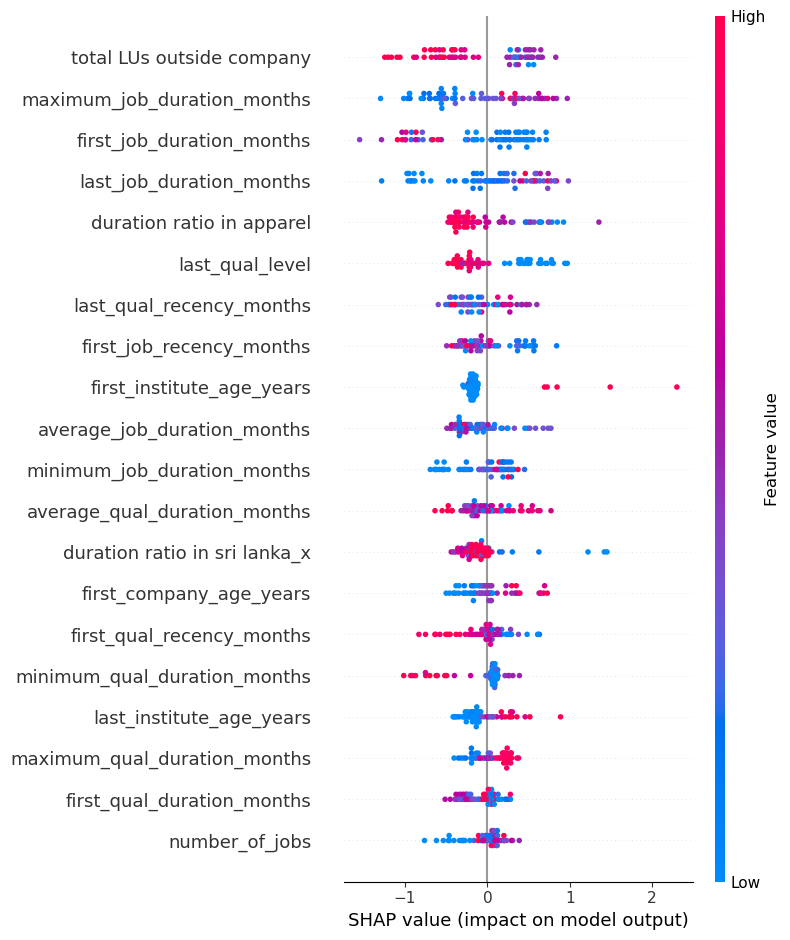

In [21]:
# Create a SHAP explainer
explainer = shap.Explainer(xgb_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Print the SHAP values for the first instance in the test set
print("SHAP values:", shap_values[0])

# Summary plot for the first instance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [22]:
explainer = shap.TreeExplainer(xgb_clf)
shap_values = explainer.shap_values(X_train)
shap.initjs()

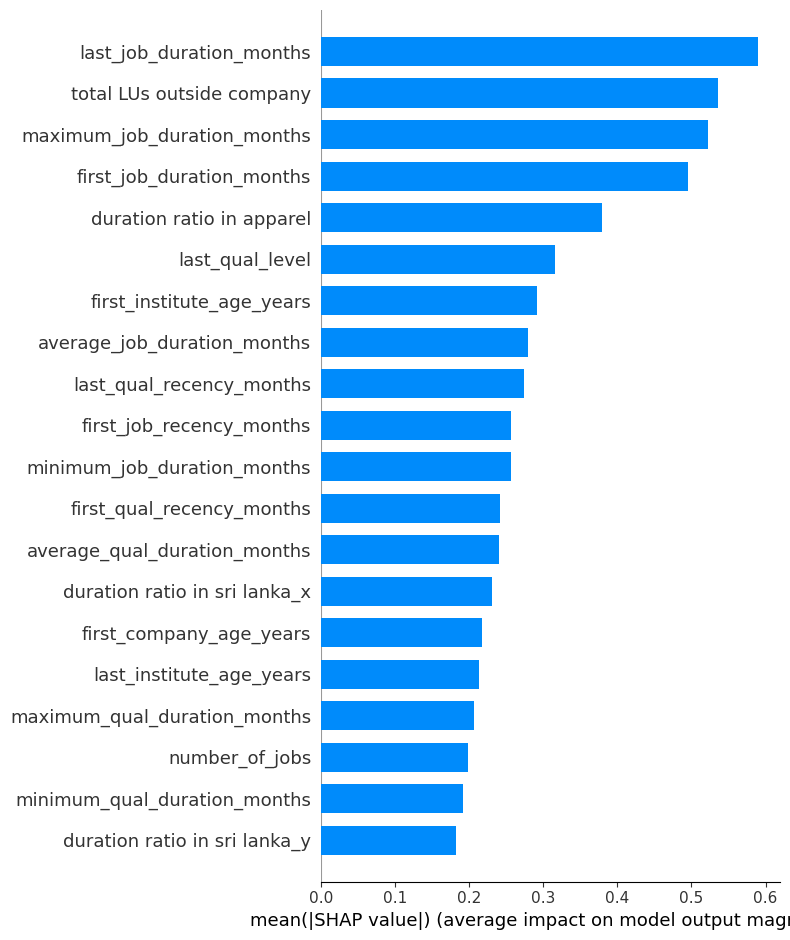

In [23]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [24]:
# Training RFClassifier model
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)

print(classification_report(y_test, y_pred))

[[46  0]
 [16  2]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        46
           1       1.00      0.11      0.20        18

    accuracy                           0.75        64
   macro avg       0.87      0.56      0.53        64
weighted avg       0.81      0.75      0.67        64



In [25]:
rf_param_grid = {
    'n_estimators': [150, 200,250],
    'max_features': [10, 20,30],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4]
}

In [26]:
# Training RFClassifier model with grid search
train_classification_model(rf_clf, rf_param_grid, X_train, y_train, X_test, y_test)

Best Parameters: {'max_depth': 2, 'max_features': 30, 'min_samples_split': 2, 'n_estimators': 150}
Confusion Matrix:
 [[45  1]
 [17  1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.98      0.83        46
           1       0.50      0.06      0.10        18

    accuracy                           0.72        64
   macro avg       0.61      0.52      0.47        64
weighted avg       0.66      0.72      0.63        64



SHAP values: [[-0.00294882 -0.01184584  0.00467315 ...  0.00352022 -0.02311547
  -0.00022064]
 [-0.00116757  0.00776237  0.00644443 ... -0.01525681  0.00059376
   0.00066123]
 [-0.00521581  0.00152983  0.00288808 ...  0.00082461 -0.02933589
  -0.00527824]
 ...
 [ 0.00838681  0.00735952 -0.00425354 ...  0.00401545 -0.03394792
  -0.00488316]
 [-0.00038268 -0.00235915 -0.02674779 ... -0.00070549 -0.0031832
   0.00352743]
 [ 0.01470376 -0.00467769 -0.01324633 ...  0.00497162  0.00900506
   0.00023293]]


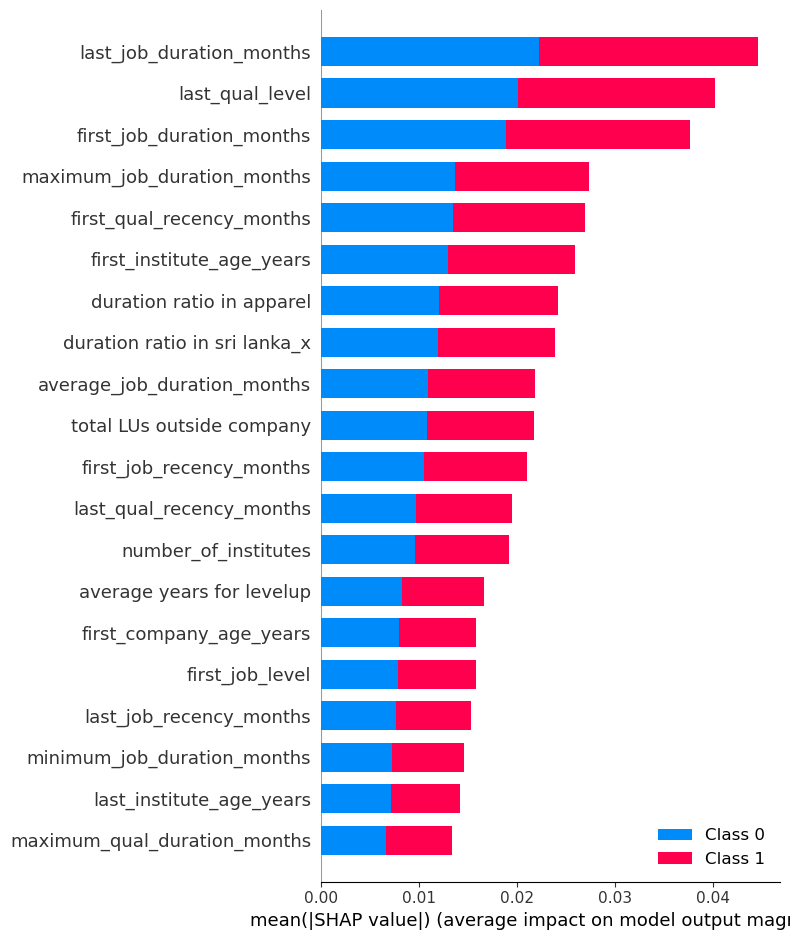

In [27]:
# Create a SHAP explainer
explainer = shap.Explainer(rf_clf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Print the SHAP values for the first instance in the test set
print("SHAP values:", shap_values[0])

# Summary plot for the first instance
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [28]:
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_train)
shap.initjs()

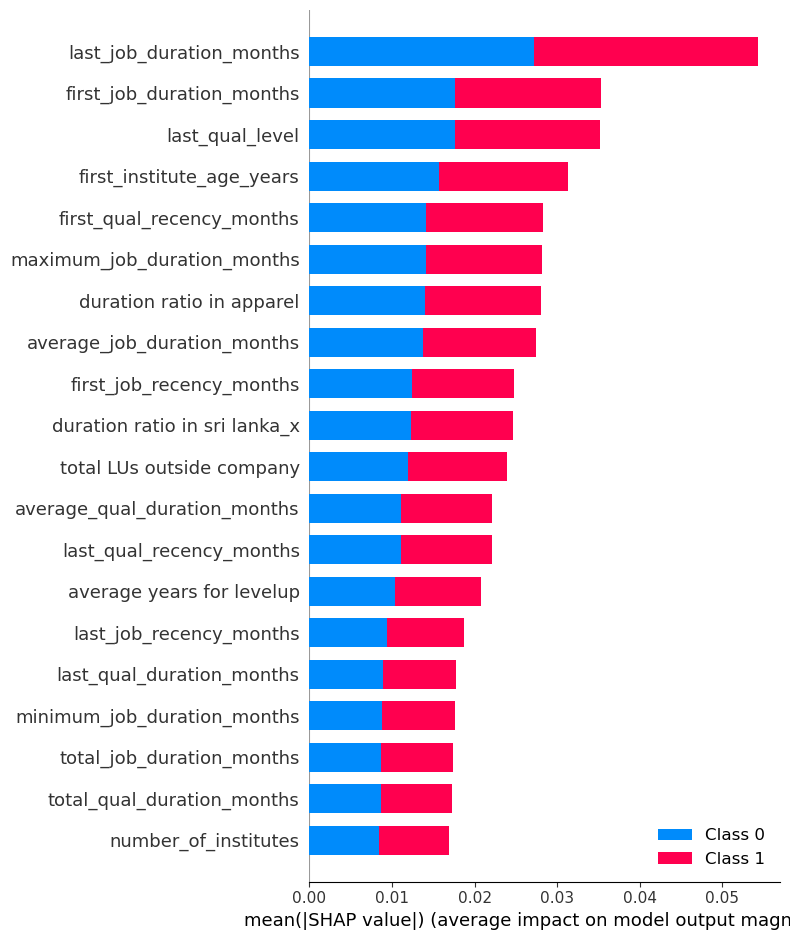

In [29]:
shap.summary_plot(shap_values, X, plot_type="bar")

In [22]:
import pickle
pickle.dump(xgb_clf, open("Horizon Model V1.pkl", "wb"))

# Ensemble models for job change classification

In [89]:
#test the three models with the test data and print their accuracy scores
#print("gb: {}".format(gb_clf.score(X_test, y_test)))
print("xgb: {}".format(xgb_clf.score(X_test, y_test)))
print("rf: {}".format(rf_clf.score(X_test, y_test)))

xgb: 0.75
rf: 0.734375


In [90]:
from sklearn.ensemble import VotingClassifier
#create a dictionary of our models
estimators=[("xgb", xgb_clf), ("rf", rf_clf)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting="soft")

In [58]:
#fit model to training data
ensemble.fit(X_train, y_train)
#test our model on the test data
ensemble.score(X_test, y_test)

0.734375

# Job horizon Numeric

In [30]:
def train_regression_model(model, param_grid, X_train, y_train, X_test, y_test):
    # Create a GridSearchCV object
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)  # Assuming X_train and y_train are your training data

    # Print the best parameters and the corresponding mean cross-validated score
    print("Best Parameters:", grid_search.best_params_)
    print("Best Score:", -grid_search.best_score_)  # Since scoring is negative mean squared error

    # Get the best estimator from the grid search
    best_estimator = grid_search.best_estimator_

    # Make predictions on the test set
    y_pred = best_estimator.predict(X_test)  # Assuming X_test is your test data

    # Evaluate the performance on the test set
    mse = mean_squared_error(y_test, y_pred)  # Assuming y_test is the true target values for the test data
    r2 = r2_score(y_test, y_pred)

    print("Mean Squared Error:", mse)
    print("R-squared:", r2)

In [31]:
#X = df_cleaned.drop(["job_change","job_change_horizon"], axis=1)
#y = df_cleaned['job_change']

Xn = df.drop(["job_change","job_change_horizon","class"], axis=1)
yn = df['job_change_horizon']

Xcn = df_cleaned.drop(["job_change","job_change_horizon","class"], axis=1)
ycn = df_cleaned['job_change_horizon']

Xn_train, Xn_test, yn_train, yn_test = train_test_split(Xn, yn, test_size=0.2,shuffle=shuffle_param)
Xcn_train, Xcn_test, ycn_train, ycn_test = train_test_split(Xcn, ycn, test_size=0.2,shuffle=shuffle_param)

In [32]:
xgb = XGBRegressor()
ridge = Ridge()
rf = RandomForestRegressor()

In [72]:
# Define the hyperparameter grid you want to search
xgb_reg_param_grid = {
    'n_estimators': [180, 200, 220],
    #'learning_rate': [0.005, 0.01, 0.015],
    #'max_depth': [3, 4, 5],
    #'subsample': [0.8, 0.9, 1.0],
    #'colsample_bytree': [0.8, 0.9, 1.0],
    #'gamma': [0, 0.1, 0.2],
    #'min_child_weight': [1, 2, 3],
}

rf_reg_param_grid = {
    'n_estimators': [180, 200, 220],
    #'max_depth': [3, 4, 5],
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    #'bootstrap': [True, False],
}

ridge_reg_param_grid = {
    'alpha': [0.1, 1.0, 10.0],
}

In [73]:
# Train XGB regressor
train_regression_model(xgb, xgb_reg_param_grid, Xn_train, yn_train, Xn_test, yn_test)

Best Parameters: {'n_estimators': 180}
Best Score: 9.260579537893154
Mean Squared Error: 11.171672897783306
R-squared: -0.3954796190820782


In [74]:
# Train XGB regressor with outliers removed data
train_regression_model(xgb, xgb_reg_param_grid, Xcn_train, ycn_train, Xcn_test, ycn_test)

Best Parameters: {'n_estimators': 180}
Best Score: 10.902957846135237
Mean Squared Error: 12.008477373307194
R-squared: -0.27474718640163287


In [75]:
# Train random forest regressor
train_regression_model(rf, rf_reg_param_grid, Xn_train, yn_train, Xn_test, yn_test)

Best Parameters: {'n_estimators': 220}
Best Score: 8.49945921406579
Mean Squared Error: 8.324938662190084
R-squared: -0.039887431317452426


In [76]:
# Train random forest regressor with outliers removed data
train_regression_model(rf, rf_reg_param_grid, Xcn_train, ycn_train, Xcn_test, ycn_test)

Best Parameters: {'n_estimators': 220}
Best Score: 8.86144795146826
Mean Squared Error: 9.385888779941169
R-squared: 0.003650925744839828


In [77]:
# Train ridge regressor
train_regression_model(ridge, ridge_reg_param_grid, Xn_train, yn_train, Xn_test, yn_test)

Best Parameters: {'alpha': 10.0}
Best Score: 10.603842896705926
Mean Squared Error: 9.705552542767194
R-squared: -0.21234311900138536


In [78]:
# Train ridge regressor with outliers removed data
train_regression_model(ridge, ridge_reg_param_grid, Xcn_train, ycn_train, Xcn_test, ycn_test)

Best Parameters: {'alpha': 10.0}
Best Score: 10.6857324733995
Mean Squared Error: 13.229025455239748
R-squared: -0.4043131742403503


In [79]:
# Voting model for regression
ensemble_model = VotingRegressor([
    ("xgb", xgb),
    ("random_forest", rf)
])

ensemble_model.fit(X=Xn_train, y=yn_train)
predictions = ensemble_model.predict(Xn_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yn_test, predictions)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate R-squared
r_squared = r2_score(yn_test, predictions)
print(f'R-squared: {r_squared}')

Mean Squared Error (MSE): 9.435305537411665
R-squared: -0.17858593764259023


In [ ]:
# Create VotingRegressor with grid search
ensemble_model = VotingRegressor([
    ("xgb", xgb),
    ("random_forest", rf)
])

# Set up parameter grid for grid search
param_grid = {
    'xgb__n_estimators': [100, 200],
    'xgb__learning_rate': [0.05, 0.1],
    'random_forest__n_estimators': [50, 100],
    'random_forest__max_depth': [None, 10]
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=ensemble_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(Xn_train, yn_train)

# Get the best model from the grid search
best_ensemble_model = grid_search.best_estimator_

# Make predictions on the test set
predictions = best_ensemble_model.predict(Xn_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(yn_test, predictions)
print(f'Best Mean Squared Error (MSE): {mse}')

# Calculate R-squared
r_squared = r2_score(yn_test, predictions)
print(f'Best R-squared: {r_squared}')

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f'Best Hyperparameters: {best_params}')